### We'll use the simple Boston House pricws set,available in scikit-learn

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [17]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)
#print((data.values))

(506, 13)


In [18]:
#print(data.DESCR)
#print(data.data)
#print(data.filename)
#print(data.target)
print(data.target.shape)

(506,)


### Quickly visualize

Text(0.5, 1.0, 'Simple histo gram')

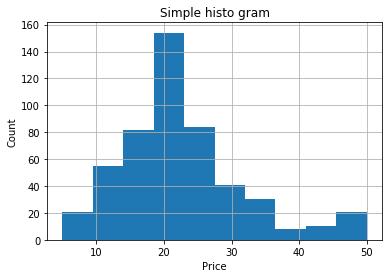

In [25]:
plt.hist(data.target)
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid()
plt.title("Simple histo gram")

#### Let's have a quick look to see if some features are more relevant than others for our problem:

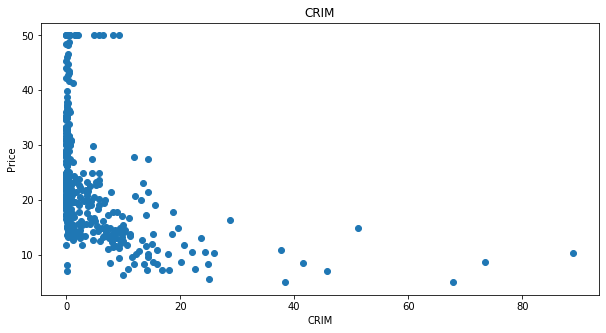

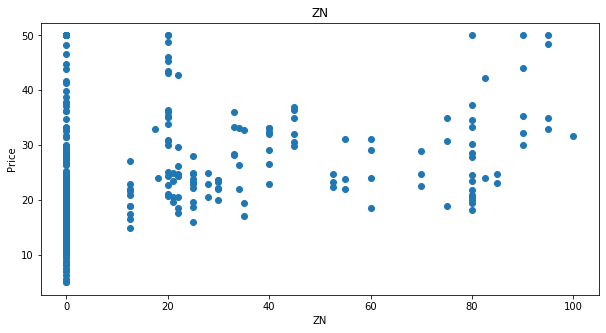

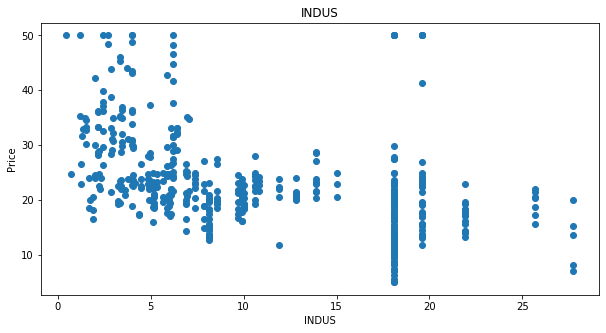

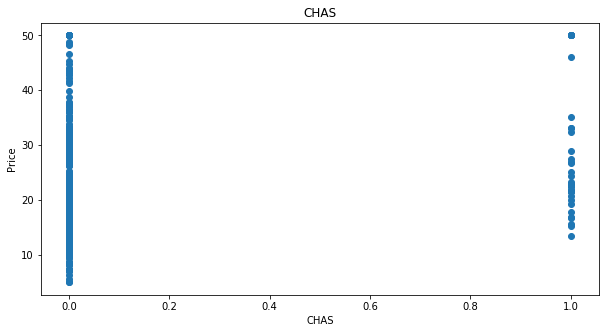

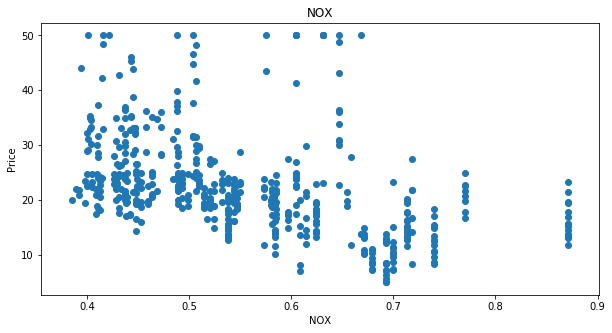

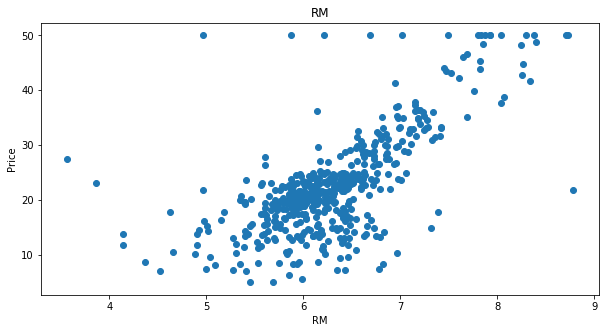

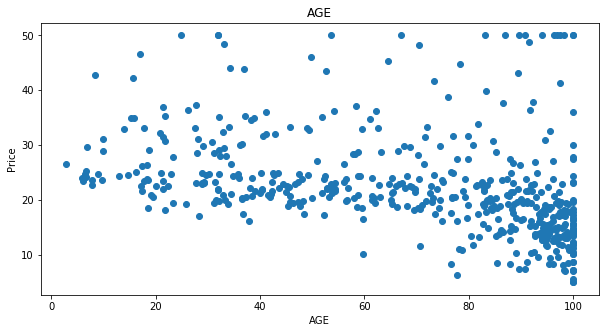

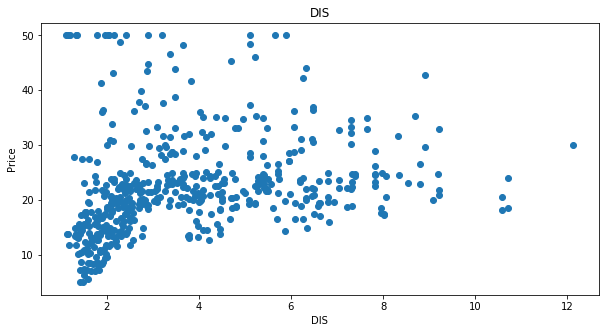

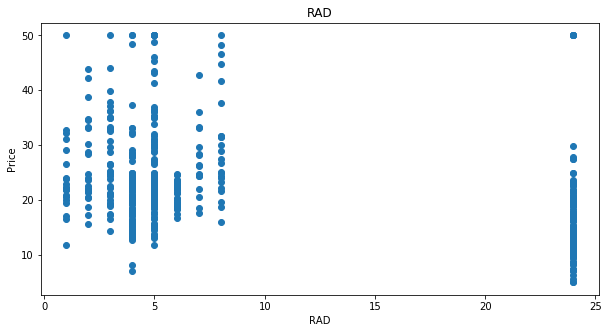

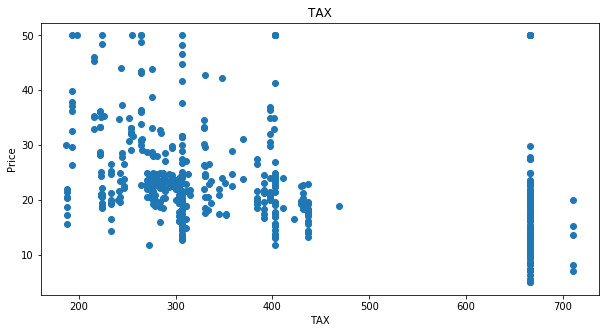

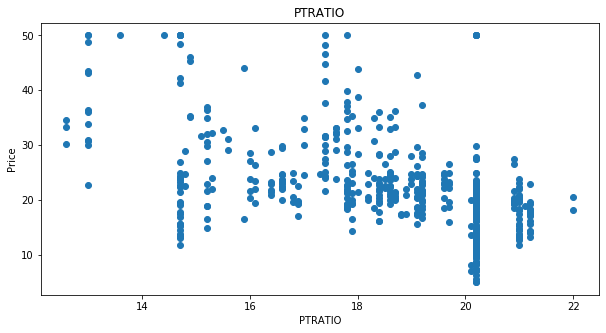

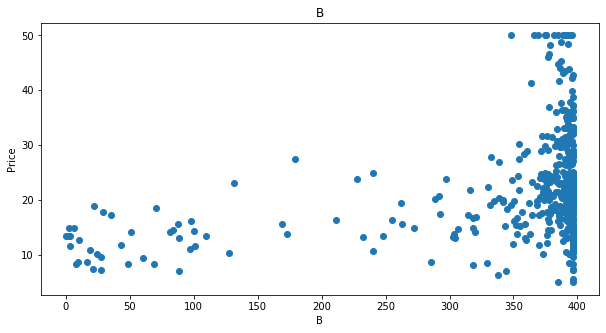

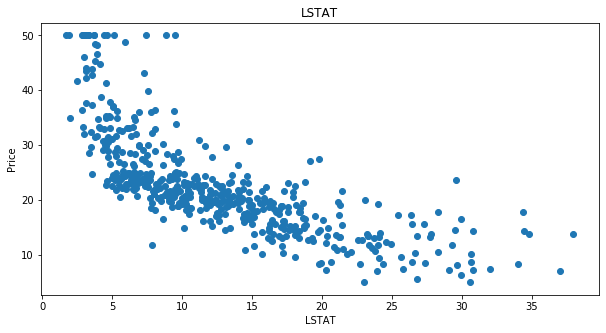

In [41]:

for index , ax in enumerate (data.feature_names):
    plt.figure(figsize=[10,5])
    #all col name and index position
    plt.scatter(data.data[:,index],data.target)
    #y axis is same in all and x axis is changing according to 
    plt.title(data.feature_names[index])
    plt.ylabel("Price")
    plt.xlabel(data.feature_names[index])

### Predicting Home Prices_ a Simple Linear Regression

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(data.data,data.target)

In [49]:
x_train.shape,x_test.size,y_train.shape , y_test.shape

((379, 13), 1651, (379,), (127,))

In [50]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
predicted = clf.predict(x_test)
expected = y_test

find out the difference square mean 

In [59]:
# print("RMS : %f "%np.sqrt(np.mean(predicted-expected**2)))


## We can Plot the error expected as a function of predicted

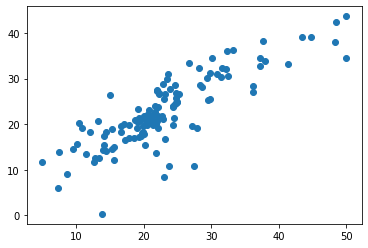

In [60]:
plt.scatter (expected,predicted)

In [63]:
from sklearn.metrics import confusion_matrix

In [73]:
#confusion_matrix(expected,predicted)
#print(metrics.confusion_matrix(predicted,expected))

# Measuring Prediction Performance

In [68]:
from sklearn.datasets import load_digits
digits = load_digits()
x = digits.data
y = digits.target

#Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Check the results Using Metrics

In [69]:
from sklearn import metrics 
y_pred = clf.predict(x)

In [71]:
print(metrics.confusion_matrix(y_pred,y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


## Decision Tree Model for Boston data we used Up

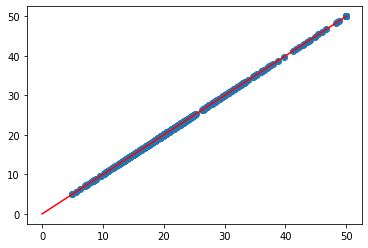

In [76]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

data = load_boston()
clf = DecisionTreeRegressor().fit(data.data , data.target)
predicted = clf.predict(data.data)

expected = data.target
plt.scatter(expected, predicted)
plt.plot([0,50],[0,50],"r")

### A correct approach : Using a validation Set

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

a training set X_train, y_train which is used for learning the parameters of a predictive model
a testing set X_test, y_test which is used for evaluating the fitted predictive model
In scikit-learn such a random split can be quickly computed with the train_test_split() function:

In [79]:
from sklearn import model_selection
x = digits.data
y = digits.target

x_train, x_test ,y_train, y_test  = model_selection.train_test_split(x,y,
                                                                    test_size = 0.25,
                                                                    random_state = 0)

In [80]:
print(x.shape , x_train.shape, x_test.shape , y_train.shape ,y_test.shape)

(1797, 64) (1347, 64) (450, 64) (1347,) (450,)


In [82]:
clf = KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)
y_pred = clf.predict(x_test) #Predict
print(metrics.confusion_matrix(y_test,y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [83]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [84]:
metrics.f1_score(y_test, y_pred,average='macro')

0.9913675218842191

In [85]:
metrics.f1_score(y_train,clf.predict(x_train),average = "macro")

1.0

## Model Selection Via Validation

In [86]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.svm import LinearSVC

x = digits.data
y = digits.target
x_train, x_test , y_train , y_test = model_selection.train_test_split(x,y,
                                                                     test_size = 0.25 ,random_state = 0)

In [93]:
for Model in [GaussianNB , KNeighborsClassifier , LinearSVC]:
    clf = Model().fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print("%s:\t
    %s"%(Model.__name__,metrics.f1_score(y_test,y_pred, average="macro")))

GaussianNB:	0.8332741681010101
KNeighborsClassifier:	0.9804562804949924
LinearSVC:	0.9281168274202791


C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [94]:
from sklearn import model_selection , datasets , metrics
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
x = digits.data
y = digits.target
x_train, x_test , y_train, y_test = model_selection.train_test_split(x,y,
                                                                    test_size = 0.25, random_state =0)

In [99]:
from sklearn import model_selection, datasets, metrics
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

digits = datasets.load_digits()
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                            test_size=0.25, random_state=0)

for Model in [LinearSVC, GaussianNB, KNeighborsClassifier]:
    clf = Model().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

print('------------------')

# test SVC loss
for loss in ['l1', 'l2']:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("LinearSVC(loss='{0}'): {1}".format(loss,
          metrics.f1_score(y_test, y_pred, average="macro")))

print('-------------------')

# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("KNeighbors(n_neighbors={0}): {1}".format(n_neighbors,
        metrics.f1_score(y_test, y_pred, average="macro")))

C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC: 0.9262058311258613
GaussianNB: 0.8332741681010101
KNeighborsClassifier: 0.9804562804949924
------------------


C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(loss='l1'): 0.9361248138725546


C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(loss='l2'): 0.9340317121626892
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


### 3.6 Plot fitting a 9th order polynomial

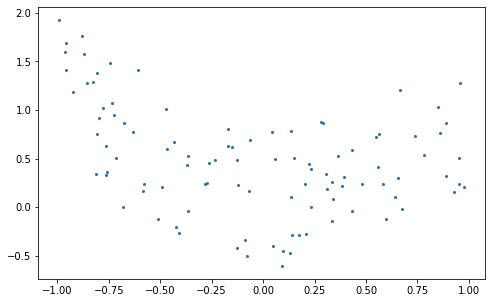

In [101]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import linear_model

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["r","g","b"])
cmap_bold = ListedColormap(["b","r","g"])

rng = np.random.RandomState(0)
x = 2*rng.rand(100)-1

f = lambda t: 1.2 *t**2 +0.1 *t**3 -0.4 *t**5 -0.5 *t**9
y = f(x) +0.4 *rng.normal(size = 100)
x_test = np.linspace(-1,1,100)
plt.figure(figsize = (8,5))
plt.scatter(x,y,s=4)

Fitting 4th and 9th order Polynomials
For thsi we need to engineer features: the n_th powers of X

### Nearest-neighbor prediction on iris

In [111]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [112]:
#Create color maps for 3-class classification problem, as with iris
cmap_light  = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()

x = iris.data[:,:2] # We only take the first two features we could
#avoid  this ugly slicing by using a two-dim dataset

y = iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(x,y)

x_min , x_max  = x[:, 0].min() - 0.1 , x[:,0].max()+0.1
y_min , y_max = x[:,1].min()-0.1,x[:,1].max()+0.1
xx , yy = np.meshgrid(np.linspace(x_min, x_max , 100),np.linspace(y_min , y_max ,100))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])


## Put the result into a color plot

(4.2, 8.0, 1.9, 4.5)

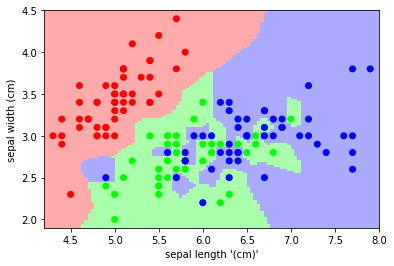

In [115]:
z = z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx,yy,z, cmap = cmap_light)
# Plot also the training Points
plt.scatter(x[:,0],x[:,1],c =y ,cmap = cmap_bold)
plt.xlabel("sepal length '(cm)'")
plt.ylabel("sepal width (cm)")
plt.axis("tight")

## Redo the analysis with 3 neighbors

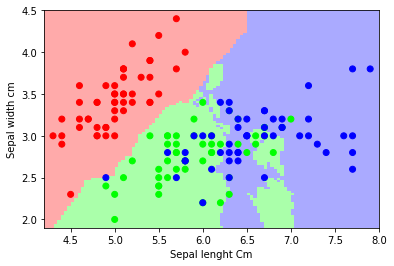

In [118]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y)

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Put the result in to color plot
z = z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy,z,cmap = cmap_light)

#Plot also the training Points 
plt.scatter(x[:,0],x[:,1], c = y, cmap=cmap_bold)

plt.xlabel("Sepal lenght Cm")
plt.ylabel ("Sepal width cm")
plt.axis("tight")

plt.show()

### Multiple Regression

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

#for 3d plots This import is necessary to have #d plotting below
#from mpl_toolkits.mplot3d import Axes3d
from mpl_toolkits.mplot3d import Axes3D

#For statistics Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

#Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

Text(0.5, 0, 'Z')

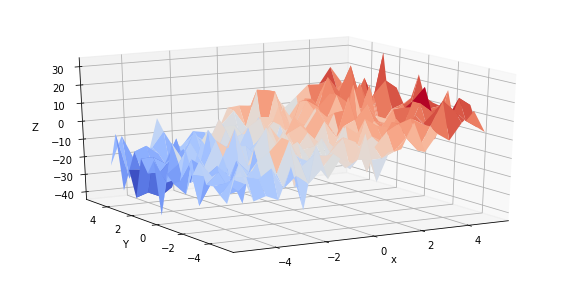

In [128]:
# Generate and Show the data
x = np.linspace(-5,5,21)
x,y = np.meshgrid(x,x)

#To get reproducable values ,  provide a seed value
np.random.seed(1)

#z is the elevation of this 2d grid

z = -5 + 3*x -0.5*y +8 * np.random.normal(size = x.shape) 

#Plot the data
fig = plt.figure(figsize=[10,5])
ax = fig.gca(projection = "3d")
surf  = ax.plot_surface(x,y,z,cmap= plt.cm.coolwarm,rstride = 1 , cstride =1)
ax.view_init(20,-120)
ax.set_xlabel("x")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

In [138]:
# Convert the data into a Pandas DataFrame to use the formulas framework
#First we need to flatten the data : it's 2d layout is not relevent
x = x.flatten()
y = y.flatten()
z = z.flatten()

data = pandas.DataFrame({"x":x, "y":y,"z":z})

#Fit the Model
model = ols("z~x+y",data).fit()

#Print the Summary
print(model.summary())

print("\n Retrieving manually the parameter estimates:")

print(model._results.params)
#Should be array ([])

#Perform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print("#*"*50)
print("\n Anova results")
print(anova_results)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           1.89e-86
Time:                        22:08:48   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

### 3.1.6.6 Test for an education/ gender interaction in wages

In [151]:
import pandas

import urllib
import os

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5],
                       )

# Convert genders to strings (this is particulary useful so that the
# statsmodels formulas detects that gender is a categorical variable)
import numpy as np
data['gender'] = np.choose(data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['wage'] = np.log10(data['wage'])

C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


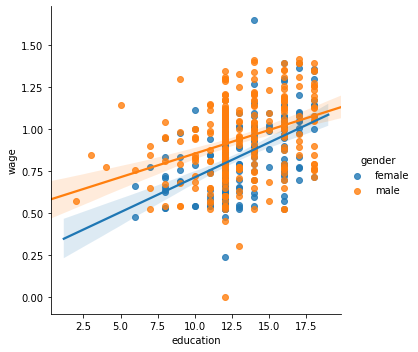

In [152]:
import seaborn

# Plot 2 linear fits for male and female.
seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

In [153]:
import statsmodels.formula.api as sm

# Note that this model is not the plot displayed above: it is one
# joined model for male and female, not separate models for male and
# female. The reason is that a single model enables statistical testing
result = sm.ols(formula='wage ~ education + gender', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           2.01e-25
Time:                        22:59:20   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.

In [154]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Sat, 09 Nov 2019   Prob (F-statistic):           2.94e-25
Time:                        22:59:59   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [155]:
import matplotlib.pyplot as plt
plt.show()

In [149]:
import pandas

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:26: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


C:\Users\krish\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

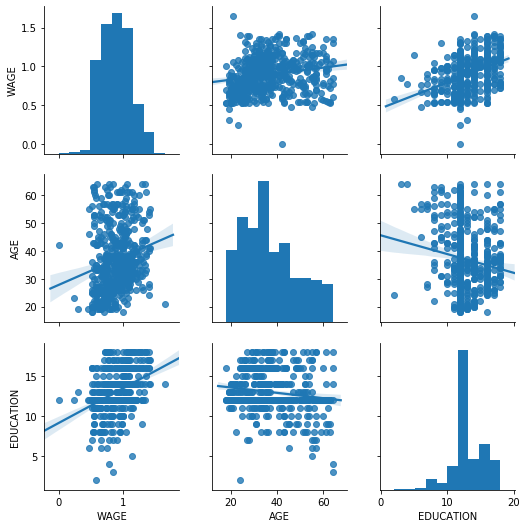

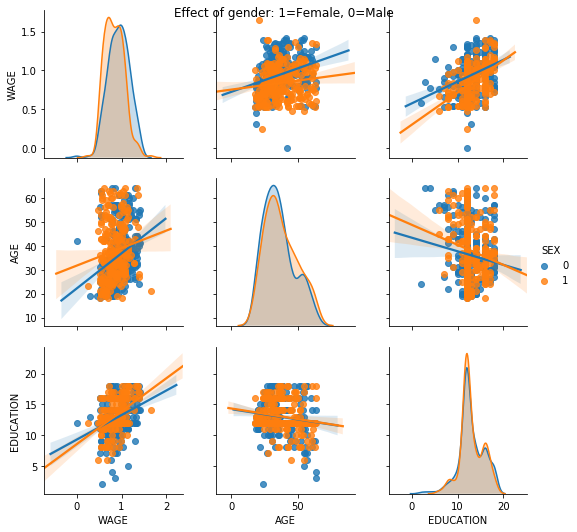

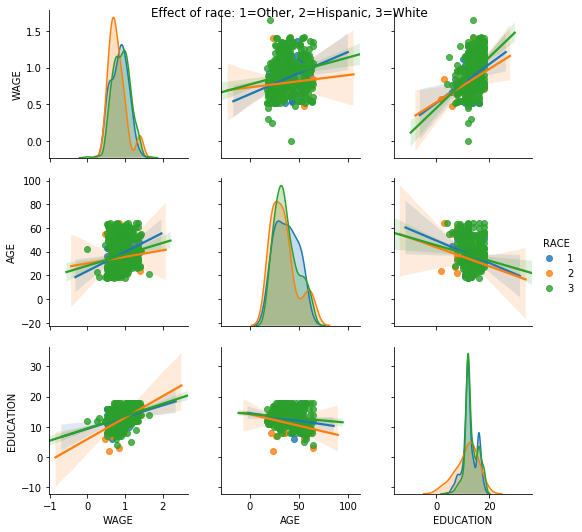

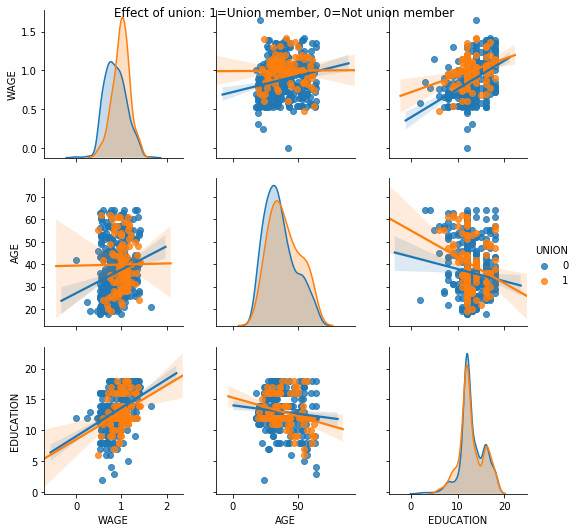

In [150]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

In [156]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()


KeyError: "None of [Index(['EDUCATION', 'WAGE'], dtype='object')] are in the [columns]"